In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from googletrans import Translator
from mpl_toolkits.basemap import Basemap
from bs4 import BeautifulSoup
import gpxpy.geo

### Renaming Columns

In [84]:
pd.set_option('display.max_rows', 2500)
df = pd.read_csv("directory.csv")
df.rename(columns={'Store Number': 'StoreNumber', 'Store Name': 'StoreName','Ownership Type': 'OwnershipType',
                   'Street Address':'StreetAddress','State/Province':'State','Phone Number':'PhoneNumber'}, inplace=True)

### Checking null values

In [85]:
df.isnull().sum()

Brand               0
StoreNumber         0
StoreName           0
OwnershipType       0
StreetAddress       2
City               15
State               0
Country             0
Postcode         1522
PhoneNumber      6861
Timezone            0
Longitude           1
Latitude            1
dtype: int64

### Checking for duplicate values

In [86]:
df1 = df[df.duplicated('StoreNumber')]
df1

,Brand,StoreNumber,StoreName,OwnershipType,StreetAddress,City,State,Country,Postcode,PhoneNumber,Timezone,Longitude,Latitude
8159,Starbucks,19773-160973,Yoido IFC Mall - 1F,Joint Venture,"23 & 23-1, Yoido-Dong, Yongdongpo-Gu, 1F, #101",Seoul,11,KR,153-023,NaN,GMT+09:00 Asia/Seoul,126.92,37.53


In [87]:
df1 = df.loc[df['StoreNumber'] == '19773-160973']
df1

,Brand,StoreNumber,StoreName,OwnershipType,StreetAddress,City,State,Country,Postcode,PhoneNumber,Timezone,Longitude,Latitude
8028,Starbucks,19773-160973,Yoido IFC Mall - 1F,Joint Venture,"23 & 23-1, Yoido-Dong, Yongdongpo-Gu, 1F, #101",Seoul,11,KR,153-023,NaN,GMT+09:00 Asia/Seoul,NaN,NaN
8159,Starbucks,19773-160973,Yoido IFC Mall - 1F,Joint Venture,"23 & 23-1, Yoido-Dong, Yongdongpo-Gu, 1F, #101",Seoul,11,KR,153-023,NaN,GMT+09:00 Asia/Seoul,126.92,37.53


### Removing duplicte values,NA s and assigning types

In [88]:
df.dropna(subset=[['Longitude']],inplace = True)
df.StreetAddress = df.StreetAddress.fillna(value ='unavailable')
df.PhoneNumber = df.PhoneNumber.fillna(value = 0)
df.Postcode = df.Postcode.fillna(value ='unavailable')
df.City = df.City.fillna(value ='unavailable')
df.Brand = df.Brand.astype('category')
df.OwnershipType = df.OwnershipType.astype('category')
df.City = df.City.astype('category')
df.State = df.State.astype('category')
df.Country = df.Country.astype('category')
df.Latitude = df.Latitude.astype('float64')
df.Longitude = df.Longitude.astype('float64')


### Checking datatypes of cleaned data

In [89]:
df.dtypes

Brand            category
StoreNumber        object
StoreName          object
OwnershipType    category
StreetAddress      object
City             category
State            category
Country          category
Postcode           object
PhoneNumber        object
Timezone           object
Longitude         float64
Latitude          float64
dtype: object

### Checking Data Summary

In [90]:
df.describe()

,Longitude,Latitude
count,25599.000000,25599.000000
mean,-27.872234,34.793016
std,96.844046,13.342332
min,-159.460000,-46.410000
25%,-104.665000,31.240000
50%,-79.350000,36.750000
75%,100.630000,41.570000
max,176.920000,64.850000


### Since most of the data is categorical,we are able to see only two columns which are numerical.We will perform analysis on counts of distribution of categorical values

### Analysis1:Plotting location of starbucks stores all over the world by using longitude and latitudes

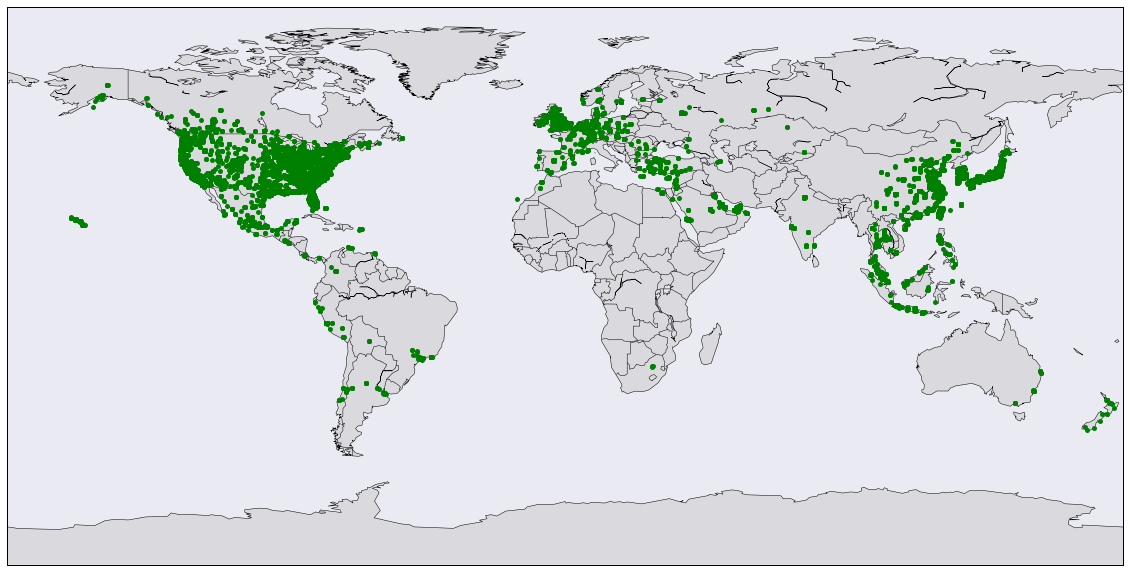

In [91]:
map = Basemap(projection = 'cyl')
plt.figure(figsize=(20,20))
#plt.figure.subtitle('test title', fontsize=20)
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.5)
map.fillcontinents(alpha=0.5)
map.drawmapboundary()
g,h = map(list(df["Longitude"]), list(df["Latitude"]))
map.plot(g, h, 'go', markersize=5, markeredgecolor='none')
plt.show()

### We can see that USA has maximum number of stores and countries like South Africa , Bolivaia have just one Starbucks store

### Analysis2:Distribution of  number of starbucks stores in each country

In [92]:
df1 = df['Country'].value_counts().reset_index()
df1.columns = ['Country', 'count']
df1

,Country,count
0,US,13608
1,CN,2734
2,CA,1468
3,JP,1237
4,KR,992
5,GB,901
6,MX,579
7,TW,394
8,TR,326
9,PH,298


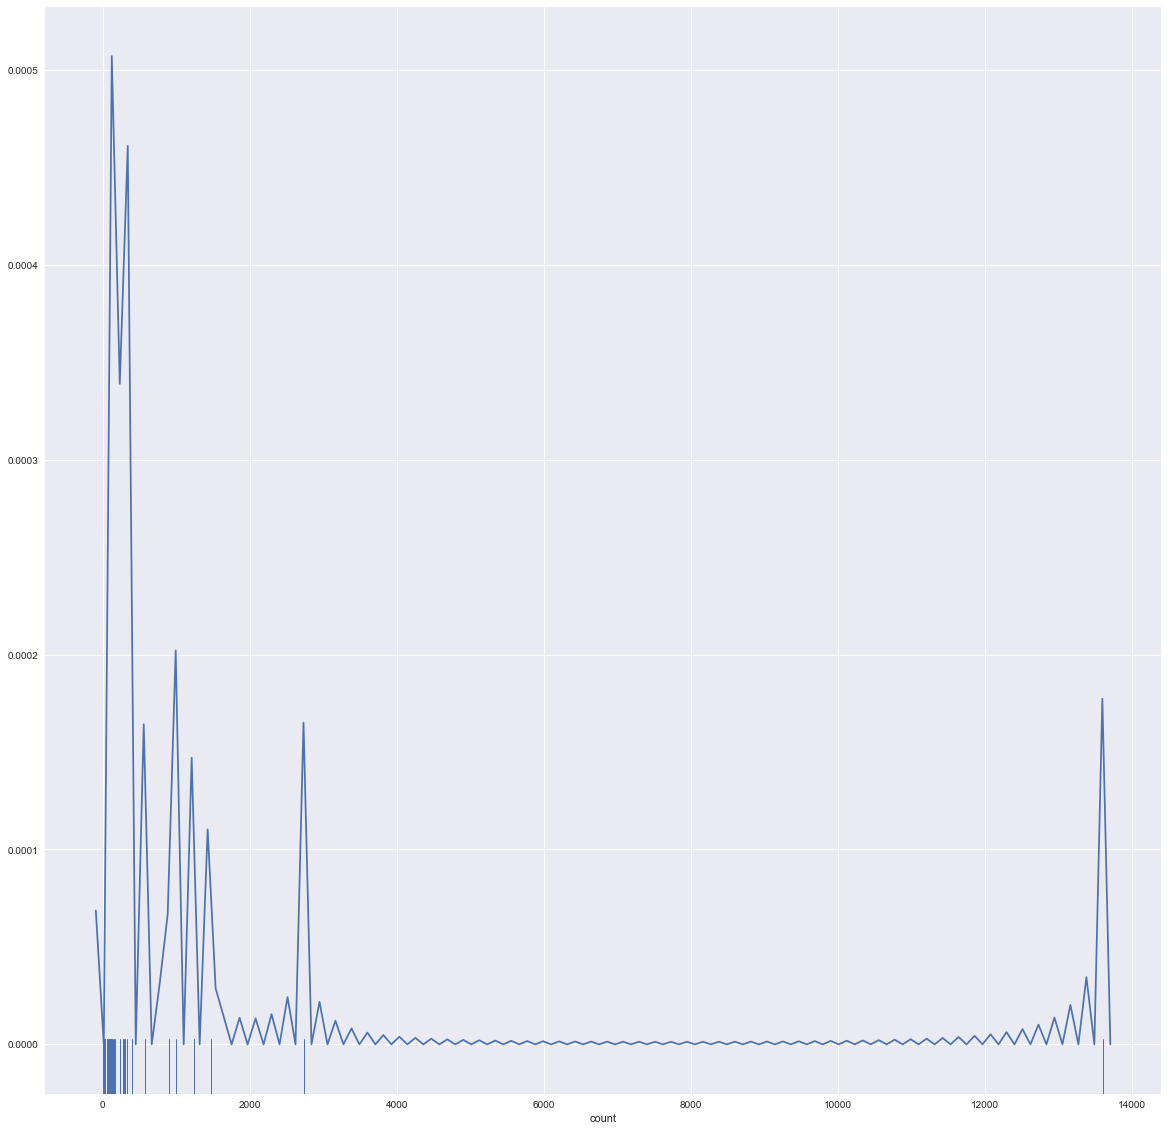

In [57]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.distplot(df1['count'],rug=True, hist=False)

 ### We can see from the above plot that the density i .e number of countries with number of starbucks outlets being less than 2000 are huge.The highest number of countries have number of starbucks stores less than 500.The two peaks on right hand side represent China and USA  with counts being around 2500 and 13500 approximately.This can be verified from above table

### Analysis3:Analyzing starbucks distribution in different cities 

In [93]:
df2 = df['City'].value_counts().reset_index()
df2.columns = ['City', 'count']
df2

,City,count
0,上海市,542
1,Seoul,242
2,北京市,234
3,New York,232
4,London,216
5,Toronto,192
6,Mexico City,180
7,Chicago,180
8,Las Vegas,156
9,Seattle,156


####  Convering Chineese and Urdu characters to English

In [94]:
def convert_text_to_English(text):
    translator = Translator()
    v = translator.translate(text,dest='en')
    output = v.text   
    return output
df.City.replace('上海市',convert_text_to_English('上海市'),inplace = True)
df.City.replace('北京市',convert_text_to_English('北京市'),inplace = True)
df.City.replace('서울',convert_text_to_English('서울'),inplace = True)
df.City.replace('杭州市',convert_text_to_English('杭州市'),inplace = True)
df.City.replace('深圳市',convert_text_to_English('深圳市'),inplace = True)
df.City.replace('广州市',convert_text_to_English('广州市'),inplace = True)
df.City.replace('成都市',convert_text_to_English('成都市'),inplace = True)
df.City.replace('苏州市',convert_text_to_English('苏州市'),inplace = True)
df.City.replace('南京市',convert_text_to_English('南京市'),inplace = True)
df.City.replace('天津市',convert_text_to_English('天津市'),inplace = True)
df.City.replace('重庆市',convert_text_to_English('重庆市'),inplace = True)
df.City.replace('无锡市',convert_text_to_English('无锡市'),inplace = True)
df.City.replace('西安市',convert_text_to_English('西安市'),inplace = True)
df.City.replace('佛山市',convert_text_to_English('佛山市'),inplace = True)
df.City.replace('مدينة الكويت',convert_text_to_English('مدينة الكويت'),inplace = True)

In [95]:
df2 = df['City'].value_counts().reset_index()
df2.columns = ['City', 'count']
df2

,City,count
0,Shanghai,544
1,Seoul,378
2,Beijing,234
3,New York,232
4,London,216
5,Toronto,192
6,Chicago,180
7,Mexico City,180
8,Las Vegas,156
9,Seattle,156


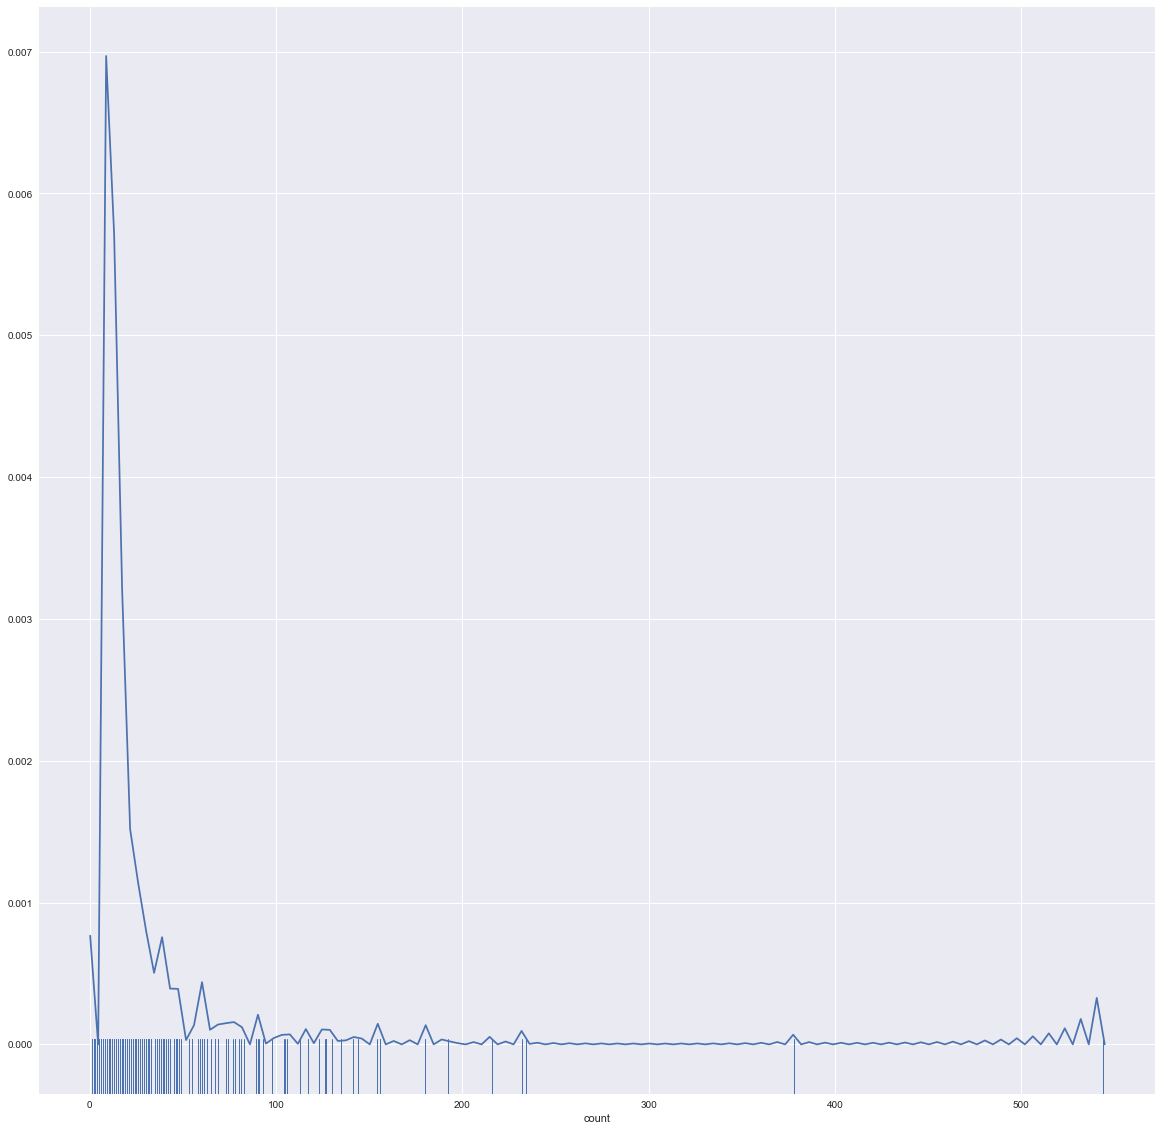

In [75]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.distplot(df2['count'],rug=True, hist=False)

### We can see that maximum number of Cities have number of starbucks between 0 to 100.The last peak on the right represents one city that has 544 stores i e Shanghai .This can be verified from above table  

### Analysis4: Analyzing starbucks locations in different states

In [96]:
df3 = df['State'].value_counts().reset_index()
df3.columns = ['State', 'count']
df3

,State,count
0,CA,2821
1,TX,1042
2,ENG,787
3,WA,757
4,11,705
5,FL,694
6,NY,645
7,31,580
8,IL,575
9,AZ,536


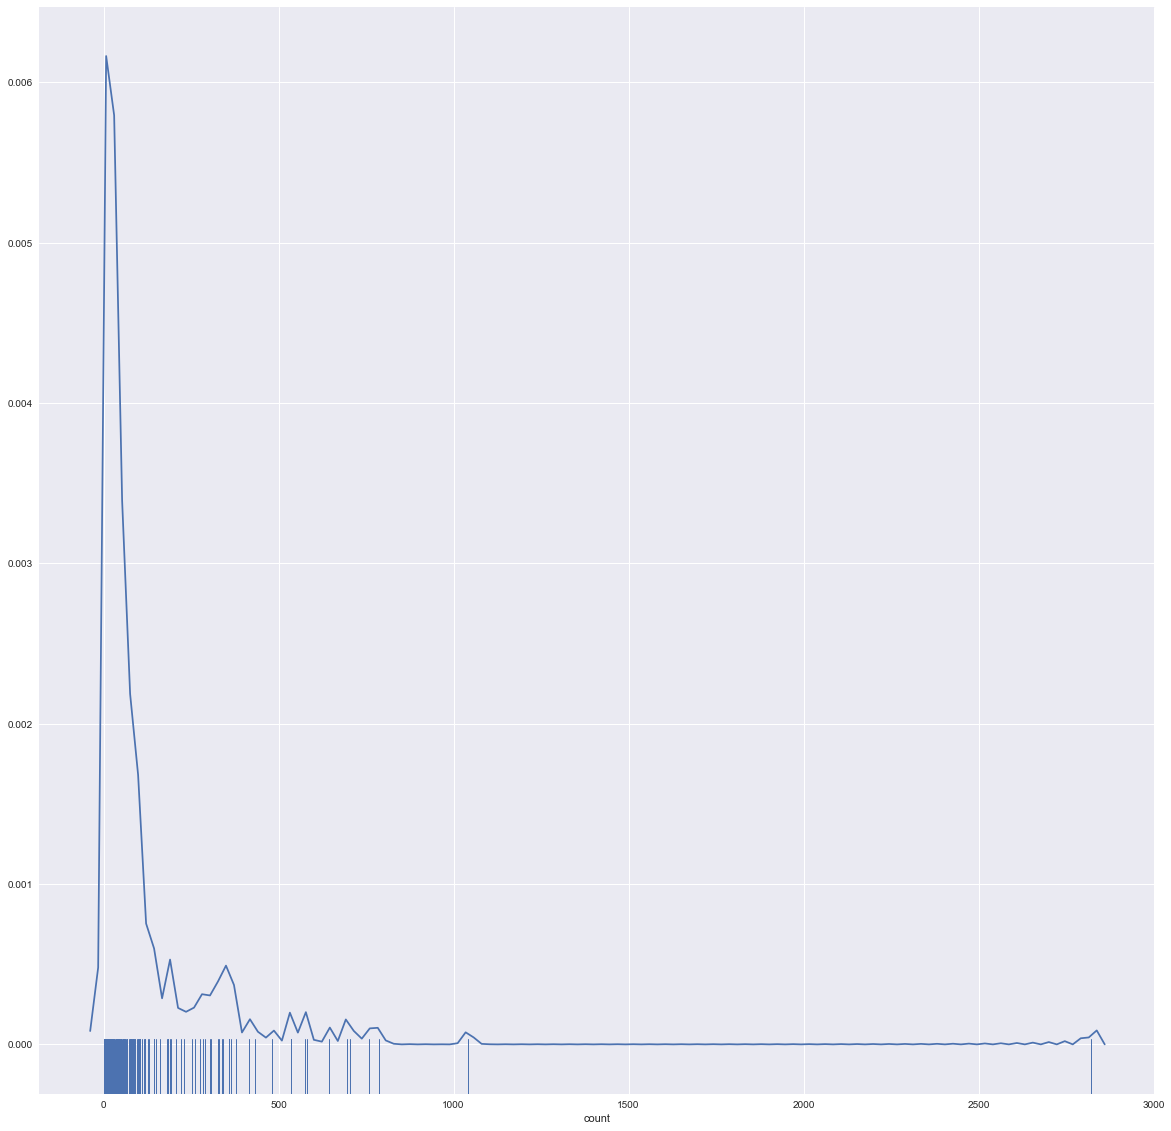

In [97]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.distplot(df3['count'],rug=True, hist=False)

### We can see that maximum number of states have outlets which are less than 250.The last peak represents California state which has more than 2500 starbucks stores.This can be verified from above table 

###  Analysis5 :Plotting number of starbucks in each country 

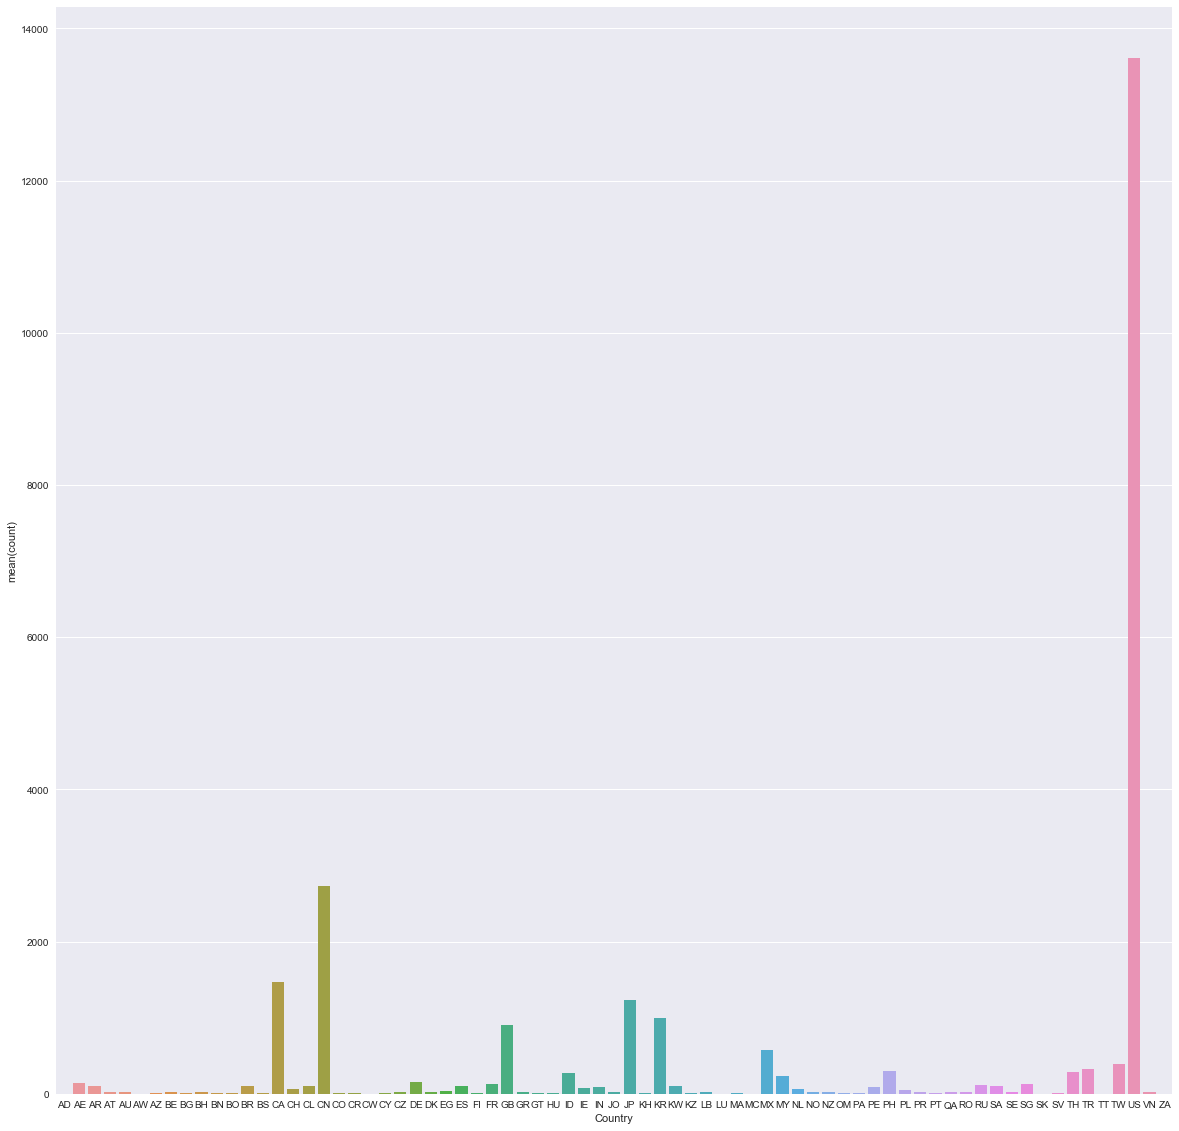

In [98]:
plt.figure(figsize=(20,20))
sns.barplot(x="Country", y="count", data=df1)

### X axis represents the country codes and y axis represents number of starbucks stores.Top 3 countries are USA ,China and Canada

### Analysis 5:Starbucks outlet type distribution 

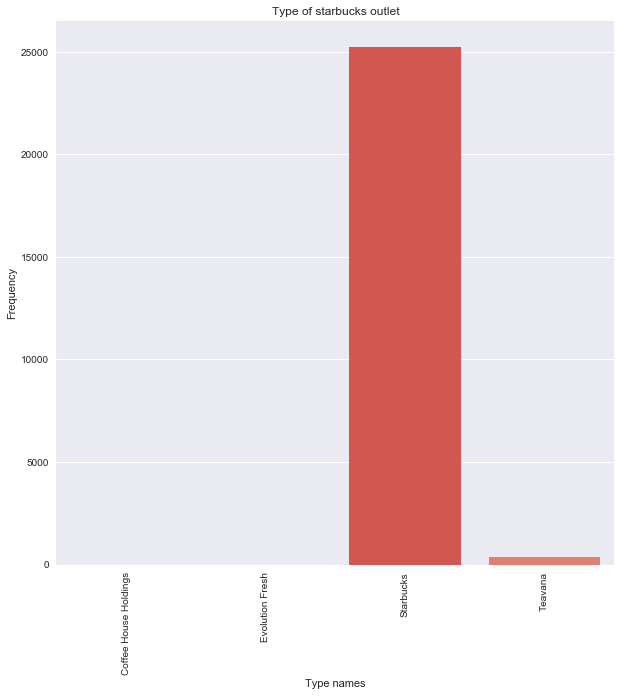

In [21]:
plt.figure(figsize=(10,10))
frequent_month = df[['Brand']].groupby('Brand').size().reset_index()
frequent_month.columns = ['Brand', 'COUNT']

ax = sns.barplot(x = "Brand", y = "COUNT",
           data = frequent_month, palette = "Reds_d")
plt.title('Type of starbucks outlet')
plt.xlabel('Type names')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

### There are 4 types of brands owned by starbucks .They are Coffee House Holdings,Evolution Fresh,Teavana and Starbucks itself.And we can see that starbucks type brand are more than 25000 and numnber of other brands are very less

### Analysis6 : Analyzing distribution of number of stores  by  taking reference point as 0 degree latitude and 0 degree longitude 

#### Calculating distance by using haversine formula

In [99]:
df['Distance'] = df.apply(lambda row: gpxpy.geo.haversine_distance(0, 0, row['Latitude'], row['Longitude']) , axis=1)

In [100]:
df4 = df['Distance'].value_counts().reset_index()
df4.columns = ['Distance', 'count']
df4

,Distance,count
0,9.155433e+06,26
1,8.597712e+06,23
2,8.666504e+06,22
3,8.665881e+06,22
4,1.235818e+07,20
5,1.333447e+07,19
6,1.279322e+07,19
7,9.811357e+06,19
8,1.426346e+07,17
9,8.665053e+06,17


### We can see that maximum number of stores i e 26 stores are located at a distance as shown in 1st row

### Details of store located nearest to 0 degree latitude and 0 degree longitude

In [103]:
df.iloc[df['Distance'].idxmax()]

Brand                             Starbucks
StoreNumber                     3870-141626
StoreName         Target Hawaii Kona T-2412
OwnershipType                      Licensed
StreetAddress           74-5455 Makala Blvd
City                                   Kona
State                                    HI
Country                                  US
Postcode                          967402711
PhoneNumber                  (808) 334-4020
Timezone         GMT-10:00 Pacific/Honolulu
Longitude                              -156
Latitude                              19.65
Distance                        1.66076e+07
Name: 17279, dtype: object

### Details of store located farthest to 0 degree latitude and 0 degree longitude

In [104]:
df.iloc[df['Distance'].idxmin()]

Brand                                                    Starbucks
StoreNumber                                            2063-142827
StoreName                               Las Palmas de Gran Canaria
OwnershipType                                             Licensed
StreetAddress    AEROPUERTO DE LAS PALMAS - Terminal TA., Plant...
City                                                         Telde
State                                                           CL
Country                                                         ES
Postcode                                                     35071
PhoneNumber                                              600501756
Timezone                                  GMT+0:00 Atlantic/Canary
Longitude                                                   -15.39
Latitude                                                     27.94
Distance                                               3.51336e+06
Name: 5122, dtype: object